In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('kmeans - kmeans_blobs.csv', sep=',')
X = data.values.astype(float)

In [25]:
#Normalization
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    normalized_X = (X - mean) / std
    return normalized_X

X_normalized = normalize(X)

In [26]:
#Implement K-means algorithm
def k_means(X, k, num_iterations=100):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(num_iterations):
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels


In [27]:
k2_labels = k_means(X, k=2)
k3_labels = k_means(X, k=3)

In [28]:
def plot_clusters(X, labels, k):
    for i in range(k):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i + 1}')

    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

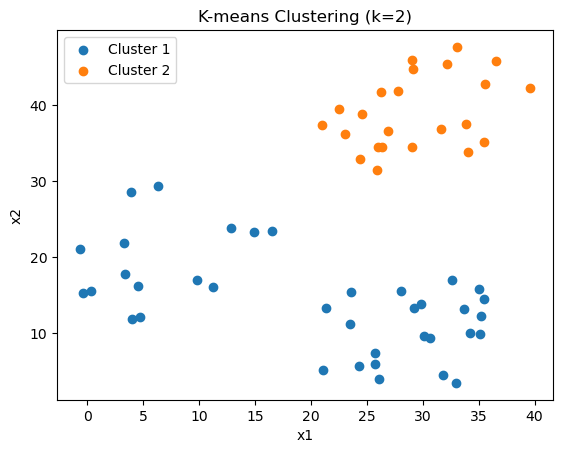

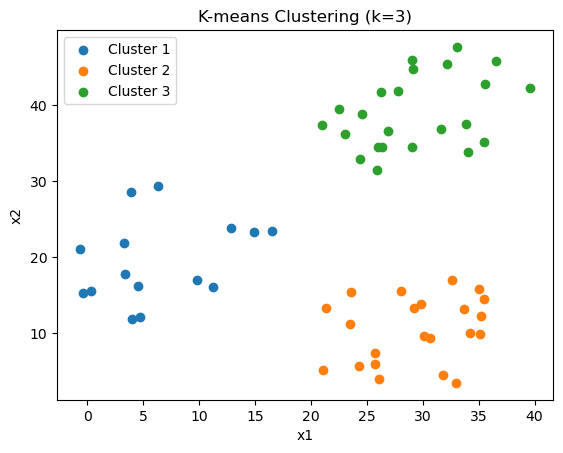

In [29]:
#Plot for k=2
plot_clusters(X, k2_labels, k=2)
#Plot for k=3
plot_clusters(X, k3_labels, k=3)